In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Read CSV File

In [2]:
file_path='D:\\Hackathon\\mu_sigma\\Problem statement 1_dataset\\adult.csv'
df=pd.read_csv(file_path)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Drop Unnecessary Features

In [3]:
df.drop(['marital-status','relationship','race','sex'],axis=1,inplace=True)

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Check if there are nan values

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
occupation        0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

# Heatmap to check multi-colinearity

<AxesSubplot:>

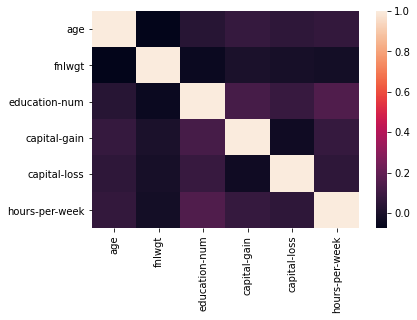

In [6]:
sns.heatmap(df.corr())

# Check if target variable is balanced or not

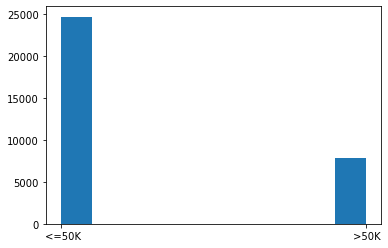

Data Count of Salary <=50 24720
Data Count of Salary >50 7841


In [7]:
plt.hist(df['salary'])
plt.show()
print("Data Count of Salary <=50",df['salary'].value_counts()[0])
print("Data Count of Salary >50",df['salary'].value_counts()[1])

# Replace String values to numbers

In [8]:

df.loc[df['salary']==' <=50K','salary']=0
df.loc[df['salary']==' >50K','salary']=1
df['salary']=pd.to_numeric(df['salary'])

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
print(df.shape[0],df.loc[(df['workclass']==' ?') | (df['workclass']=='?'),'workclass'].shape[0])

32561 1836


C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass'>

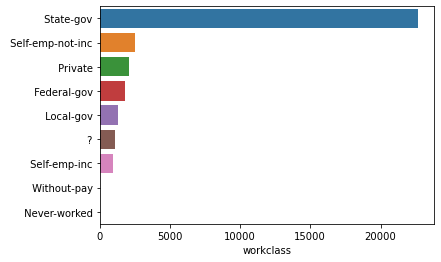

In [11]:
sns.barplot(df['workclass'].value_counts(),df['workclass'].unique())

# Replace ' ?' with mode

In [12]:
df.loc[(df['workclass']==' ?') | (df['workclass']=='?'),'workclass']=df['workclass'].mode()[0]


C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education'>

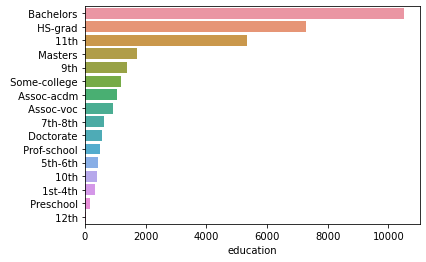

In [13]:

sns.barplot(df['education'].value_counts(),df['education'].unique())

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation'>

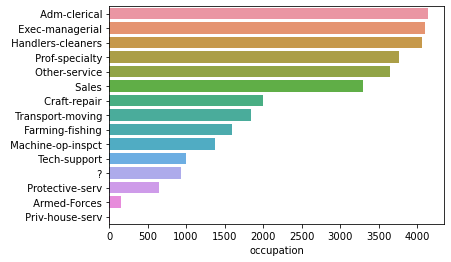

In [14]:

sns.barplot(df['occupation'].value_counts(),df['occupation'].unique())

In [15]:
print(df.shape[0],df.loc[(df['occupation']==' ?') | (df['occupation']=='?'),'occupation'].shape[0])

32561 1843


# Replace ' ?' with mode

In [16]:
df.loc[(df['occupation']==' ?') | (df['occupation']=='?'),'occupation']=df['occupation'].mode()[0]


In [17]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country'>

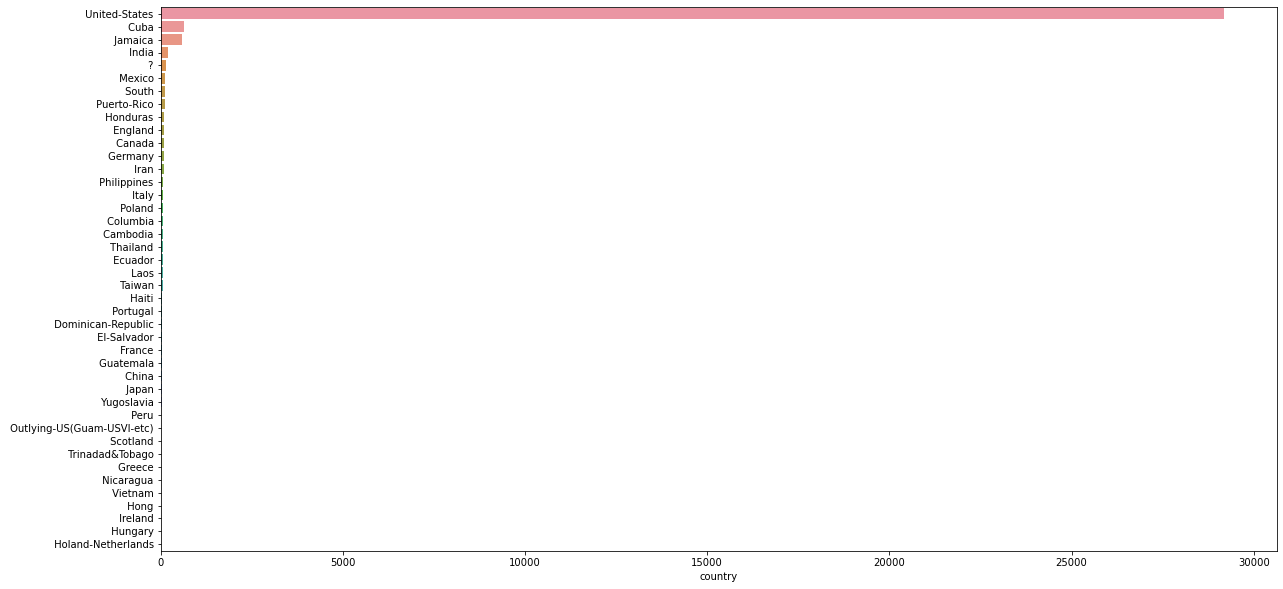

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(df['country'].value_counts(),df['country'].unique())

In [19]:
print(df.shape[0],df.loc[(df['country']==' ?') | (df['country']=='?'),'country'].shape[0])

32561 583


# Replace ' ?' with mode

In [20]:
df.loc[(df['country']==' ?') | (df['country']=='?'),'country']=df['country'].mode()[0]
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
df['workclass'].replace(df['workclass'].unique(),[i for i in range(df['workclass'].unique().shape[0])],inplace=True)

df['education'].replace(df['education'].unique(),[i for i in range(df['education'].unique().shape[0])],inplace=True)

df['occupation'].replace(df['occupation'].unique(),[i for i in range(df['occupation'].unique().shape[0])],inplace=True)

df['country'].replace(df['country'].unique(),[i for i in range(df['country'].unique().shape[0])],inplace=True)

df

,age,workclass,fnlwgt,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,0,13,0,2174,0,40,0,0
1,50,1,83311,0,13,1,0,0,13,0,0
2,38,2,215646,1,9,2,0,0,40,0,0
3,53,2,234721,2,7,2,0,0,40,0,0
4,28,2,338409,0,13,3,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,10,0,0,38,0,0
32557,40,2,154374,1,9,9,0,0,40,0,1
32558,58,2,151910,1,9,0,0,0,40,0,0
32559,22,2,201490,1,9,0,0,0,20,0,0


# Data Normalization

In [22]:
df['fnlwgt']=(df['fnlwgt']-df['fnlwgt'].mean())/df['fnlwgt'].std()

df['education-num']=(df['education-num']-df['education-num'].mean())/df['education-num'].std()

df['capital-gain']=(df['capital-gain']-df['capital-gain'].mean())/df['capital-gain'].std()

df['capital-loss']=(df['capital-loss']-df['capital-loss'].mean())/df['capital-loss'].std()



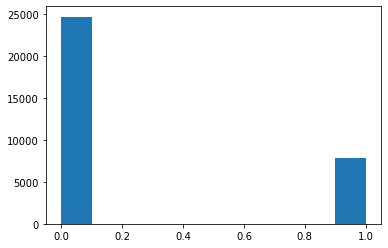

Data Count of Salary <=50 24720
Data Count of Salary >50 7841


In [23]:
plt.hist(df['salary'])
plt.show()
print("Data Count of Salary <=50",df['salary'].value_counts()[0])
print("Data Count of Salary >50",df['salary'].value_counts()[1])

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country'>

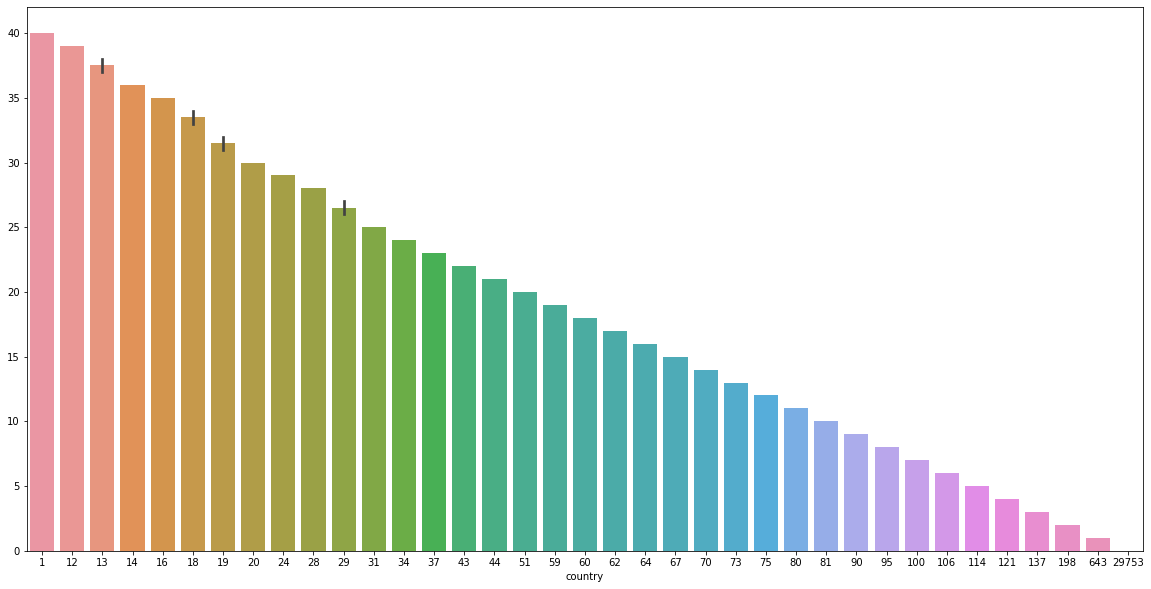

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(df['country'].value_counts(),df['country'].unique())

# Apply under-sampling to make balanced dataset

In [25]:
df2=df.drop(df[(df['salary']==0) & (df['country']==0)].index[:15000],axis=0)
df2.shape

(17561, 11)

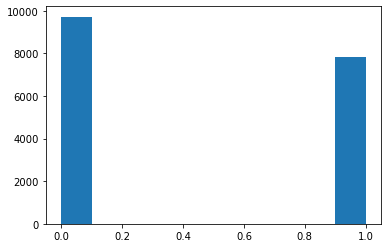

Data Count of Salary <=50 24720
Data Count of Salary >50 7841


In [26]:
plt.hist(df2['salary'])
plt.show()
print("Data Count of Salary <=50",df['salary'].value_counts()[0])
print("Data Count of Salary >50",df['salary'].value_counts()[1])

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country'>

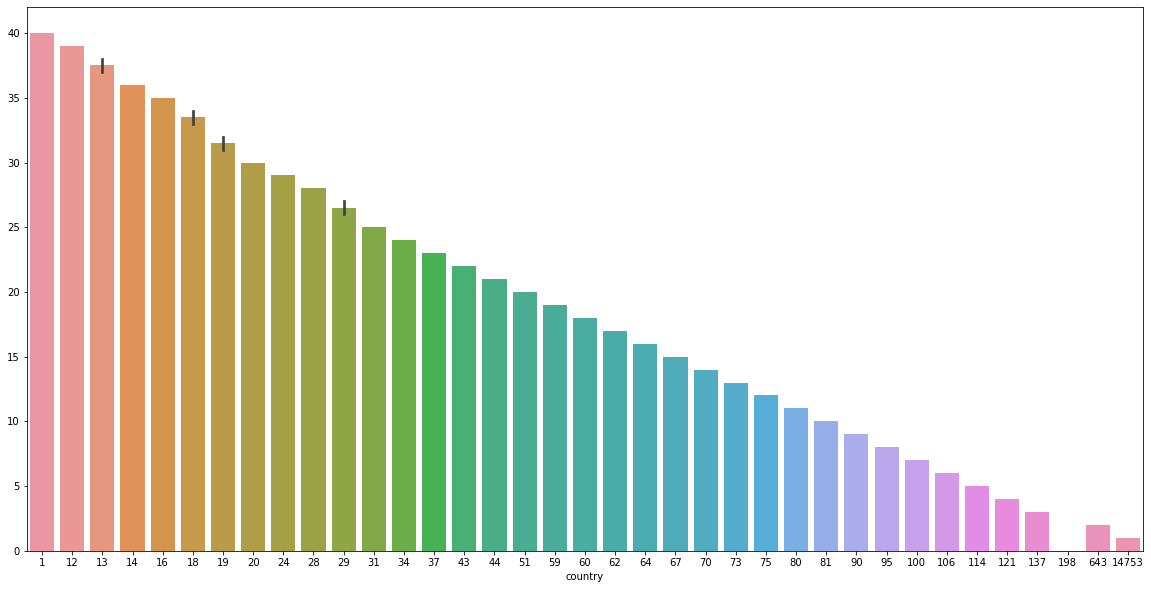

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(df2['country'].value_counts(),df2['country'].unique())

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(14048, 10) (14048,) (3513, 10) (3513,)


In [29]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [30]:
predictions=model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1976
           1       0.74      0.74      0.74      1537

    accuracy                           0.77      3513
   macro avg       0.77      0.77      0.77      3513
weighted avg       0.77      0.77      0.77      3513



In [33]:
tn, fp, fn, tp =confusion_matrix(y_test,predictions).ravel()
confusion_mat=[[tp,fp],[fn,tn]]
print("\nConfusion Matrix:\n\t",confusion_mat[0],"\n\t",confusion_mat[1])

print("\n\nAccuracy:",accuracy_score(y_test,predictions))
print("Precision:",precision_score(y_test,predictions))
print("Recall:",recall_score(y_test,predictions))


Confusion Matrix:
	 [1143, 412] 
	 [394, 1564]


Accuracy: 0.7705664674067748
Precision: 0.735048231511254
Recall: 0.7436564736499675


In [34]:
import pickle
filename = 'D:\\Hackathon\\mu_sigma\\PS_1_of_1_finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [51]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [52]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.4min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [53]:
predictions=grid_search.best_estimator_.predict(x_test)
tn, fp, fn, tp =confusion_matrix(y_test,predictions).ravel()
confusion_mat=[[tp,fp],[fn,tn]]
print("\nConfusion Matrix:\n\t",confusion_mat[0],"\n\t",confusion_mat[1])

print("\n\nAccuracy:",accuracy_score(y_test,predictions))
print("Precision:",precision_score(y_test,predictions))
print("Recall:",recall_score(y_test,predictions))


Confusion Matrix:
	 [1126, 416] 
	 [411, 1560]


Accuracy: 0.7645886706518645
Precision: 0.7302204928664072
Recall: 0.7325959661678595


In [55]:
import pickle
filename = 'D:\\Hackathon\\mu_sigma\\PS_1_of_1_finalized_model_GSCV.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))